In [1]:
#############################################
## Investigate Primary Care Abstract Topic Model --- 1) stratified by time/year, 2) stratified by institution
##
## Author: Chris Meaney
## Date: January 2023
#############################################

In [2]:
## Dependency packages --- used for plotting 
library(ggplot2)
library(viridis)

Loading required package: viridisLite



In [3]:
## Option to print more rows/columns in Jupyter Notebook
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

In [4]:
#############################
## Import Data
#############################

In [5]:
## Set working directory path
wd_path <- "Enter_a_Path_to_a_Working_Directory_For_This_Project"

## Import Processed Theta Matrix
fpath_theta = paste0(wd_path, "//NMF_X_theta.csv")

X_theta <- read.csv(file=fpath_theta, header=TRUE, sep=",", stringsAsFactors=FALSE)
str(X_theta)

'data.frame':	12276 obs. of  86 variables:
 $ au_id                 : num  1e+10 1e+10 1e+10 1e+10 1e+10 ...
 $ prism_url             : chr  "https://api.elsevier.com/content/abstract/scopus_id/85140976962" "https://api.elsevier.com/content/abstract/scopus_id/85121747496" "https://api.elsevier.com/content/abstract/scopus_id/85112107056" "https://api.elsevier.com/content/abstract/scopus_id/85118672412" ...
 $ eid                   : chr  "2-s2.0-85140976962" "2-s2.0-85121747496" "2-s2.0-85112107056" "2-s2.0-85118672412" ...
 $ doi                   : chr  "10.1016/j.socscimed.2022.115463" "10.1111/add.15760" "10.1016/j.socscimed.2021.114262" "10.3399/BJGP.2021.0195" ...
 $ issn                  : chr  "02779536" "09652140" "02779536" "09601643" ...
 $ eissn                 : chr  "18735347" "13600443" "18735347" "14785242" ...
 $ pub_title             : chr  "Brief opportunistic interventions by general practitioners to promote smoking cessation: A conversation analytic study" "The old 

In [6]:
## Import Phi
phi <- read.csv(file=paste0(wd_path, "\\NMF_phi.csv"), header=TRUE, sep=",", stringsAsFactors=FALSE)
dim(phi)

[1]    60 48821

In [7]:
## Import vocab
fpath_vocab = paste0(wd_path, "\\vocab.csv")

vocab = read.csv(file=fpath_vocab, sep=",", header=TRUE, stringsAsFactors=FALSE)
vocab <- vocab$vocab

length(vocab)

[1] 48821

In [8]:
###########################################
## Normalize theta and phi matrices
###########################################

In [9]:
K <- nrow(phi)

In [10]:
topics <- paste0("Topic", 1:K)
theta <- X_theta[,topics]
theta_ <- theta/rowSums(theta)
str(theta_)

'data.frame':	12276 obs. of  60 variables:
 $ Topic1 : num  0 0 0 0.000241 0 ...
 $ Topic2 : num  0.5981 0.2146 0 0.0171 0 ...
 $ Topic3 : num  0 0 0 0.113 0 ...
 $ Topic4 : num  0.022644 0.073411 0 0.000103 0 ...
 $ Topic5 : num  0.016 0.0506 0 0.0975 0 ...
 $ Topic6 : num  0 0 0 0.074 0 ...
 $ Topic7 : num  0 0 0 0.00276 0 ...
 $ Topic8 : num  0 0.0127 0.0561 0.0114 0.0114 ...
 $ Topic9 : num  0.0456 0.0205 0 0.0252 0 ...
 $ Topic10: num  0 0 0.0764 0.0012 0 ...
 $ Topic11: num  0.0107 0 0.0276 0 0.0334 ...
 $ Topic12: num  0.045 0.156 0.144 0.0793 0.0146 ...
 $ Topic13: num  0 0 0 0 0.139 ...
 $ Topic14: num  0 0 0 0 0 ...
 $ Topic15: num  0 0.02792 0 0.00445 0 ...
 $ Topic16: num  0.01893 0 0 0.00801 0 ...
 $ Topic17: num  0 0 0.0105 0 0.0301 ...
 $ Topic18: num  0.03286 0.06608 0.03954 0.00883 0.02008 ...
 $ Topic19: num  0.0117 0 0.0346 0.0525 0 ...
 $ Topic20: num  0 0 0 0.00275 0.02932 ...
 $ Topic21: num  0 0 0 0.15 0 ...
 $ Topic22: num  0 0 0 0 0 ...
 $ Topic23: num  0 0 0 0

In [11]:
summary(unlist(theta_))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.016667 0.008523 0.883880 

In [12]:
sum(is.na(theta_))

[1] 0

In [13]:
## Phi Matrix
phi_ <- phi/rowSums(phi)
dim(phi_)

[1]    60 48821

In [14]:
summary(unlist(phi_))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.00e+00 0.00e+00 0.00e+00 2.05e-05 0.00e+00 4.09e-01 

In [15]:
sum(is.na(unlist(phi_)))

[1] 0

In [16]:
##########
##
## Get top words loading on a given topic
##
##########

In [17]:
get_top_terms <- function(topic, num_words) {
    vec <- c(unlist(phi_[topic, ]))
    vec <- round(sort(vec, decreasing=TRUE), 3)
    return(round(head(vec, num_words), 3))
}

In [18]:
topics_list <- list()

for (i in 1:nrow(phi_)) {
    topics_list[[i]] <- get_top_terms(topic=i, num_words=5)
}

topics_list

[[1]]
 outcomes   outcome secondary     birth  maternal 
    0.229     0.021     0.012     0.011     0.010 

[[2]]
  smoking cessation   tobacco      quit   smokers 
    0.115     0.061     0.028     0.024     0.023 

[[3]]
 studies included     bias reported criteria 
   0.168    0.025    0.012    0.010    0.009 

[[4]]
    people     living population       aged     prison 
     0.224      0.015      0.012      0.008      0.008 

[[5]]
  practice physicians  practices     family  physician 
     0.093      0.058      0.052      0.028      0.018 

[[6]]
          risk            cvd      increased cardiovascular    individuals 
         0.243          0.016          0.013          0.010          0.009 

[[7]]
          bp hypertension         mmhg          sbp           hg 
       0.113        0.060        0.020        0.013        0.013 

[[8]]
 decision decisions       aid      aids       sdm 
    0.104     0.020     0.019     0.018     0.017 

[[9]]
      patient    engagement    experience    clinicians communication 
        0.173         0.020         0.013         0.012         0.011 

[[10]]
      data  collected    sources collection    methods 
     0.242      0.014      0.011      0.010      0.010 

[[11]]
    health     public population    systems    digital 
     0.286      0.018      0.010      0.008      0.008 

[[12]]
 patients  received   treated     total emergency 
    0.294     0.005     0.004     0.004     0.004 

[[13]]
    review systematic    reviews   included literature 
     0.053      0.033      0.023      0.020      0.017 

[[14]]
diabetes     type     hbac  control distress 
   0.180    0.054    0.024    0.014    0.012 

[[15]]
intervention      control  feasibility   randomized       change 
       0.178        0.033        0.010        0.009        0.009 

[[16]]
     time      days    median sedentary diagnosis 
    0.112     0.022     0.009     0.009     0.008 

[[17]]
    rates    visits      rate emergency incidence 
    0.069     0.042     0.022     0.017     0.015 

[[18]]
  primary      care secondary   outcome practices 
    0.341     0.026     0.018     0.015     0.013 

[[19]]
    study    design    assess    period objective 
    0.308     0.015     0.012     0.011     0.010 

[[20]]
 children    asthma   parents     child childhood 
    0.112     0.018     0.017     0.015     0.010 

[[21]]
   factors   identify        aor  influence identified 
     0.143      0.013      0.011      0.010      0.010 

[[22]]
    cancer  diagnosis   cervical       lung colorectal 
     0.195      0.020      0.016      0.016      0.015 

[[23]]
implementation     strategies        program      framework        process 
         0.096          0.023          0.016          0.010          0.009 

[[24]]
    hiv  living testing     art  sexual 
  0.108   0.021   0.017   0.016   0.010 

[[25]]
evidence   trials       rr  adverse  effects 
   0.123    0.051    0.022    0.016    0.016 

[[26]]
  compared       odds   adjusted      ratio confidence 
     0.075      0.028      0.022      0.022      0.019 

[[27]]
      social        media        risks   assistance determinants 
       0.174        0.018        0.010        0.007        0.007 

[[28]]
            costs              cost        healthcare             total 
            0.084             0.044             0.023             0.020 
costeffectiveness 
            0.016 

[[29]]
interventions     effective        trials effectiveness        change 
        0.201         0.014         0.014         0.013         0.012 

[[30]]
mortality  allcause     death    deaths       cvd 
    0.130     0.021     0.021     0.018     0.013 

[[31]]
        women     pregnancy      pregnant         birth contraceptive 
        0.164         0.028         0.014         0.012         0.010 

[[32]]
  symptoms depression    anxiety depressive    symptom 
     0.091      0.050      0.025      0.021      0.018 

[[33]]
       blood     pressure     systolic           h

In [19]:
topics_vec <- list()

for (i in 1:length(topics_list)) {
    nam <- names(topics_list[[i]])[1:5] 
    val <- c(topics_list[[i]])[1:5]
    x <- paste0(nam, " (", round(val*100,2), ")")
    topics_vec[[i]] <- x
}

topics_vec <- sapply(topics_vec, paste0, collapse="  ")
topics_vec

[1] "outcomes (22.9)  outcome (2.1)  secondary (1.2)  birth (1.1)  maternal (1)"                   
 [2] "smoking (11.5)  cessation (6.1)  tobacco (2.8)  quit (2.4)  smokers (2.3)"                    
 [3] "studies (16.8)  included (2.5)  bias (1.2)  reported (1)  criteria (0.9)"                     
 [4] "people (22.4)  living (1.5)  population (1.2)  aged (0.8)  prison (0.8)"                      
 [5] "practice (9.3)  physicians (5.8)  practices (5.2)  family (2.8)  physician (1.8)"             
 [6] "risk (24.3)  cvd (1.6)  increased (1.3)  cardiovascular (1)  individuals (0.9)"               
 [7] "bp (11.3)  hypertension (6)  mmhg (2)  sbp (1.3)  hg (1.3)"                                   
 [8] "decision (10.4)  decisions (2)  aid (1.9)  aids (1.8)  sdm (1.7)"                             
 [9] "patient (17.3)  engagement (2)  experience (1.3)  clinicians (1.2)  communication (1.1)"      
[10] "data (24.2)  collected (1.4)  sources (1.1)  collection (1)  methods (1)"                     
[11] "health (28.6)  public (1.8)  population (1)  systems (0.8)  digital (0.8)"                    
[12] "patients (29.4)  received (0.5)  treated (0.4)  total (0.4)  emergency (0.4)"                 
[13] "review (5.3)  systematic (3.3)  reviews (2.3)  included (2)  literature (1.7)"                
[14] "diabetes (18)  type (5.4)  hbac (2.4)  control (1.4)  distress (1.2)"                         
[15] "intervention (17.8)  control (3.3)  feasibility (1)  randomized (0.9)  change (0.9)"          
[16] "time (11.2)  days (2.2)  median (0.9)  sedentary (0.9)  diagnosis (0.8)"                      
[17] "rates (6.9)  visits (4.2)  rate (2.2)  emergency (1.7)  incidence (1.5)"                      
[18] "primary (34.1)  care (2.6)  secondary (1.8)  outcome (1.5)  practices (1.3)"                  
[19] "study (30.8)  design (1.5)  assess (1.2)  period (1.1)  objective (1)"                        
[20] "children (11.2)  asthma (1.8)  parents (1.7)  child (1.5)  childhood (1)"                     
[21] "factors (14.3)  identify (1.3)  aor (1.1)  influence (1)  identified (1)"                     
[22] "cancer (19.5)  diagnosis (2)  cervical (1.6)  lung (1.6)  colorectal (1.5)"                   
[23] "implementation (9.6)  strategies (2.3)  program (1.6)  framework (1)  process (0.9)"          
[24] "hiv (10.8)  living (2.1)  testing (1.7)  art (1.6)  sexual (1)"                               
[25] "evidence (12.3)  trials (5.1)  rr (2.2)  adverse (1.6)  effects (1.6)"                        
[26] "compared (7.5)  odds (2.8)  adjusted (2.2)  ratio (2.2)  confidence (1.9)"                    
[27] "social (17.4)  media (1.8)  risks (1)  assistance (0.7)  determinants (0.7)"                  
[28] "costs (8.4)  cost (4.4)  healthcare (2.3)  total (2)  costeffectiveness (1.6)"                
[29] "interventions (20.1)  effective (1.4)  trials (1.4)  effectiveness (1.3)  change (1.2)"       
[30] "mortality (13)  allcause (2.1)  death (2.1)  deaths (1.8)  cvd (1.3)"                         
[31] "women (16.4)  pregnancy (2.8)  pregnant (1.4)  birth (1.2)  contraceptive (1)"                
[32] "symptoms (9.1)  depression (5)  anxiety (2.5)  depressive (2.1)  symptom (1.8)"               
[33] "blood (9.6)  pressure (7.2)  systolic (1.9)  hg (1.9)  hypertension (1.6)"                    
[34] "disease (11.4)  chronic (4.6)  cardiovascular (2.2)  kidney (1.4)  diseases (1.4)"            
[35] "dementia (14.3)  family (3.5)  residents (2.2)  carers (2.2)  living (2)"                     
[36] "age (9.5)  sex (1.4)  individuals (1.4)  cohort (1.3)  aged (1.1)"                            
[37] "physical (11)  activity (10.6)  sedentary (1.1)  exercise (1.1)  levels (1)"                  
[38] "months (12.1)  baseline (2.6)  followup (1.9)  month (1.6)  difference (1.4)"                 
[39] "care (40.9)  palliative (2.7)  providers (1.3)  usual (1)  integrated (0.8)"                  
[40] "model (7.2)  models (4.8)  performance (1.3)  validation

In [20]:
######################
##
## Aggregate topical prevalence vectors by year (creating a multivariate time series dataset)
## Plot each of the resulting univariate time series and inspect for trends
##
## Note: here I do NOT want to merge with DOI and have duplicates by authors --- since only want single paper represented in year it was published --- author attribution does not matter for this analysis
##
######################

In [21]:
topic_vars <- paste0("Topic", 1:nrow(phi_))

topics_by_year <- aggregate(X_theta[,topic_vars], list(as.factor(X_theta$pub_year)), mean)
names(topics_by_year) <- c("pub_year", topic_vars)
topics_by_year$pub_year <- as.character(topics_by_year$pub_year)
# str(topics_by_year)

In [22]:
years <- as.character(2017:2022)

topics_by_year_sm <- topics_by_year[topics_by_year$pub_year %in% years, ]
topics_by_year_sm

,pub_year,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,Topic32,Topic33,Topic34,Topic35,Topic36,Topic37,Topic38,Topic39,Topic40,Topic41,Topic42,Topic43,Topic44,Topic45,Topic46,Topic47,Topic48,Topic49,Topic50,Topic51,Topic52,Topic53,Topic54,Topic55,Topic56,Topic57,Topic58,Topic59,Topic60
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017,0.02888072,0.01725226,0.03034320,0.01456295,0.02237806,0.02663102,0.007852375,0.009785151,0.01670277,0.02309361,0.02681294,0.02860508,0.02004743,0.011371640,0.01695477,0.01865989,0.01659319,0.01759753,0.03044693,0.01320427,0.01559231,0.01357120,0.01216895,0.013761143,0.01711206,0.02612400,0.009827254,0.010590456,0.01279205,0.010009094,0.01479488,0.01295177,0.011510821,0.01494536,0.007562051,0.02095097,0.01430972,0.01374193,0.03456370,0.01752672,0.01832516,0.008535466,0.011350807,0.03380075,0.02395292,0.01741448,0.009365240,0.009983399,0.01282852,0.001426073,0.01798372,0.01961581,0.01628278,0.02000922,0.01460770,0.006800948,0.01167459,0.01614961,0.02069980,0.007010781
2,2018,0.02975148,0.01531920,0.03192301,0.01479486,0.02436533,0.02408855,0.005502807,0.009200819,0.01899603,0.02466980,0.02648005,0.02903756,0.02129178,0.008772314,0.01625742,0.01741208,0.01518737,0.01806110,0.02880258,0.01370808,0.01419058,0.01248016,0.01364198,0.012515327,0.01555680,0.02579410,0.012383942,0.012030238,0.01433089,0.009896656,0.01330094,0.01142355,0.010169491,0.01550638,0.006955373,0.01895583,0.01563562,0.01365248,0.03491111,0.01590386,0.01814890,0.008511449,0.013110890,0.03388445,0.02471575,0.01819592,0.010864198,0.010870729,0.01148632,0.001725183,0.01930037,0.01696679,0.01470003,0.02013319,0.01737087,0.005739069,0.01182328,0.01745768,0.02341604,0.008721381
3,2019,0.03038360,0.01681664,0.02970862,0.01594391,0.02478401,0.02325867,0.005890908,0.011511678,0.01816589,0.02377404,0.02987848,0.02652723,0.02073882,0.008100755,0.01685725,0.01557165,0.01542353,0.01815298,0.02901802,0.01163012,0.01462311,0.01137894,0.01572880,0.012886001,0.01593660,0.02389331,0.010662525,0.011805503,0.01532033,0.010791475,0.01548168,0.01130699,0.010618474,0.01512201,0.008141736,0.01923010,0.01255449,0.01241430,0.03828080,0.01577870,0.01922524,0.008485417,0.009807560,0.03796678,0.02255221,0.01826478,0.012824896,0.009886480,0.01033725,0.001525048,0.01846249,0.01545963,0.01612607,0.02084451,0.01551423,0.005111947,0.01246150,0.01624326,0.02488720,0.009920846
4,2020,0.03207387,0.01298978,0.02964227,0.01939861,0.02237281,0.02428499,0.005302598,0.010585490,0.01757713,0.02479707,0.03045008,0.02671991,0.02266084,0.009886246,0.01549897,0.01576344,0.01465470,0.01704453,0.03012087,0.01151754,0.01407510,0.01115013,0.01473408,0.010965478,0.01542778,0.02427602,0.013723423,0.012880337,0.01269772,0.010299437,0.01284827,0.01136483,0.008356336,0.01392049,0.008381899,0.01925771,0.01276552,0.01135906,0.03785961,0.01707751,0.01740098,0.009943707,0.009449734,0.03639113,0.02378979,0.01934559,0.012237743,0.010222387,0.01185620,0.010472981,0.01451498,0.01493178,0.01592212,0.02268022,0.01394931,0.005841062,0.01300616,0.01873080,0.02367370,0.008877118
5,2021,0.03337763,0.01083747,0.02914895,0.01871335,0.02103419,0.02703139,0.004773454,0.008959897,0.01658181,0.02146657,0.02893688,0.02631124,0.02204632,0.009491429,0.01573554,0.01669992,0.01589544,0.01610128,0.02925671,0.01281751,0.01486164,0.01227831,0.01287212,0.009142384,0.01681963,0.02274681,0.014255866,0.009111553,0.01472692,0.012757799,0.01229164,0.01195346,0.009359389,0.01497828,0.008858354,0.02032093,0.013818

In [23]:
#table(rowSums(topics_by_year_sm[,-1]))

In [24]:
## ReShape the dataframe above to facilitate plotting
topics_by_year_df <- data.frame(t(topics_by_year_sm[,-1]))
names(topics_by_year_df) <- paste0("y", 2017:2022)
rownames(topics_by_year_df) <- paste0("Topic ", sprintf("%02d", 1:K), ":  ", topics_vec)
topics_by_year_df

,y2017,y2018,y2019,y2020,y2021,y2022
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Topic 01: outcomes (22.9) outcome (2.1) secondary (1.2) birth (1.1) maternal (1),0.028880717,0.029751477,0.030383599,0.032073874,0.033377632,0.034346443
Topic 02: smoking (11.5) cessation (6.1) tobacco (2.8) quit (2.4) smokers (2.3),0.017252261,0.015319204,0.016816636,0.012989781,0.010837473,0.012911529
Topic 03: studies (16.8) included (2.5) bias (1.2) reported (1) criteria (0.9),0.030343197,0.031923014,0.029708620,0.029642267,0.029148953,0.026784874
Topic 04: people (22.4) living (1.5) population (1.2) aged (0.8) prison (0.8),0.014562948,0.014794859,0.015943910,0.019398607,0.018713351,0.020666991
Topic 05: practice (9.3) physicians (5.8) practices (5.2) family (2.8) physician (1.8),0.022378060,0.024365326,0.024784012,0.022372807,0.021034190,0.021865688
Topic 06: risk (24.3) cvd (1.6) increased (1.3) cardiovascular (1) individuals (0.9),0.026631020,0.024088554,0.023258671,0.024284991,0.027031393,0.027620300
Topic 07: bp (11.3) hypertension (6) mmhg (2) sbp (1.3) hg (1.3),0.007852375,0.005502807,0.005890908,0.005302598,0.004773454,0.005060909
Topic 08: decision (10.4) decisions (2) aid (1.9) aids (1.8) sdm (1.7),0.009785151,0.009200819,0.011511678,0.010585490,0.008959897,0.009052878
Topic 09: patient (17.3) engagement (2) experience (1.3) clinicians (1.2) communication (1.1),0.016702765,0.018996031,0.018165891,0.017577127,0.016581806,0.015337826


In [25]:
max(unname(unlist(topics_by_year_df)))

[1] 0.0382808

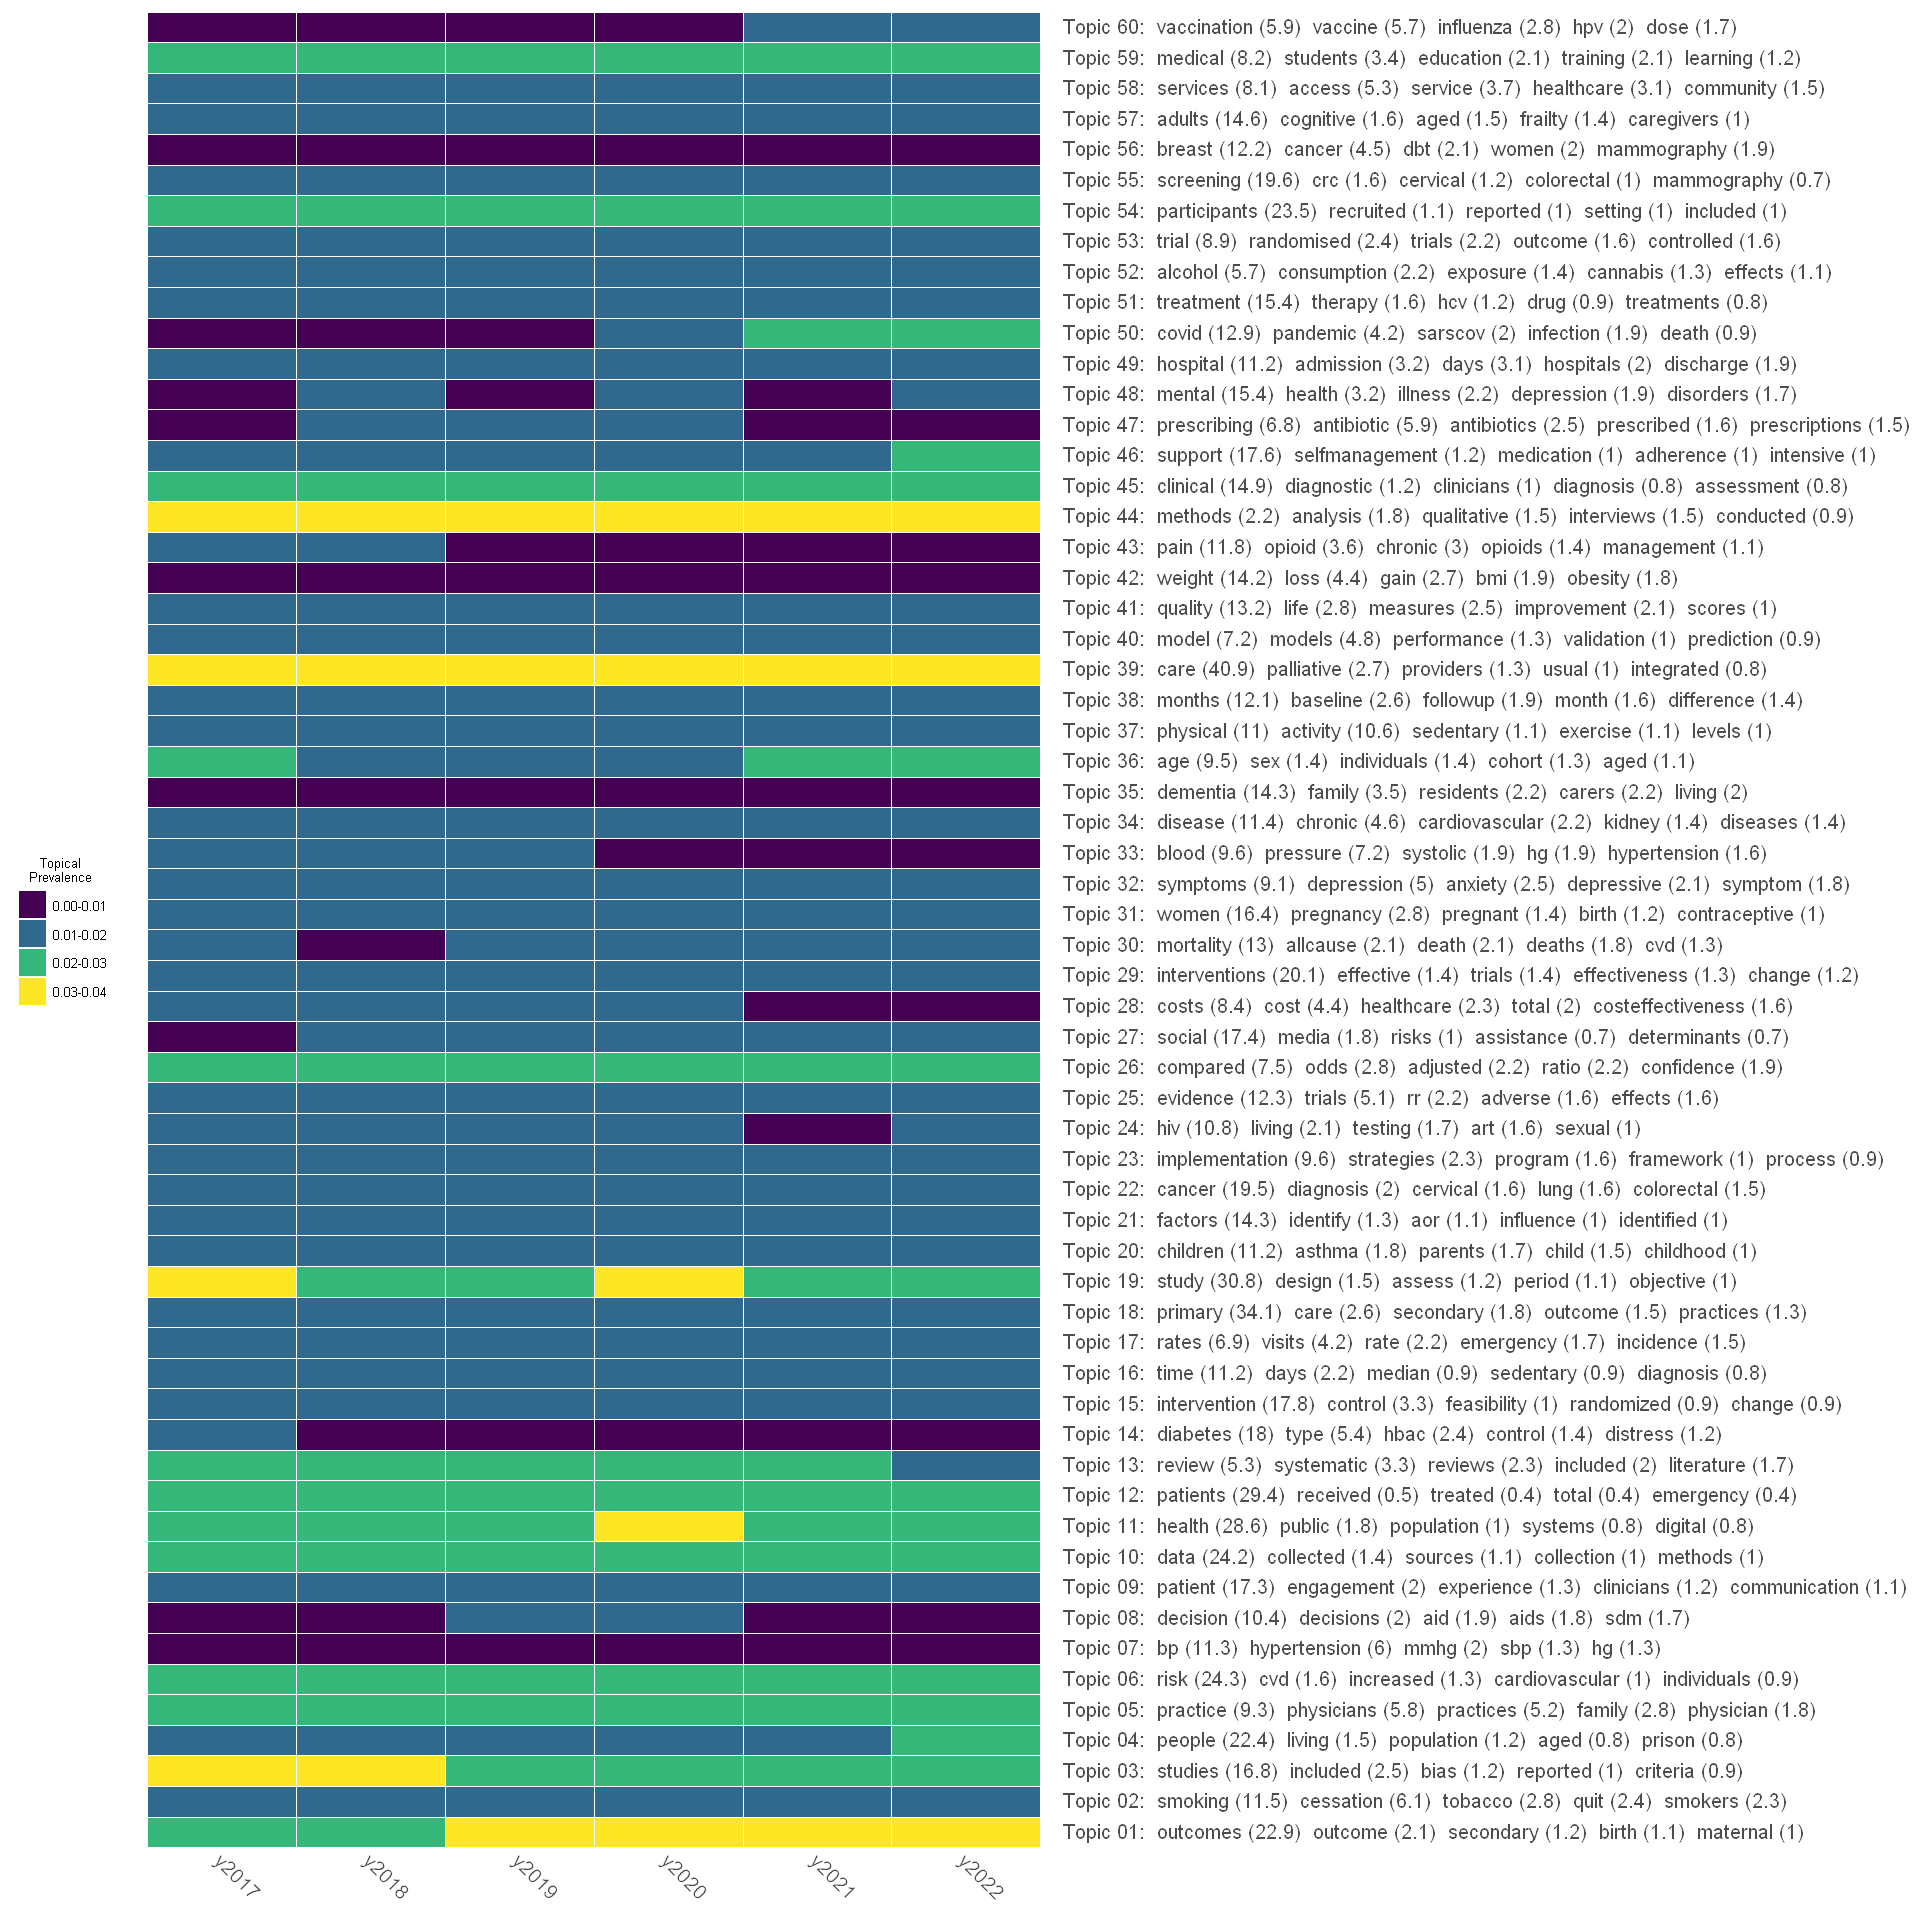

In [26]:
## Plot the correlation matrix above
options(repr.plot.width=16, repr.plot.height=16)

col_nams <- names(topics_by_year_df)
row_nams <- rownames(topics_by_year_df)

prev_vec <- unlist(topics_by_year_df)

row_lab_vec <- rep(row_nams, ncol(topics_by_year_df))
row_lab_vec <- factor(row_lab_vec, levels=row_nams, labels=row_nams)

col_lab_vec <- rep(col_nams, each=nrow(topics_by_year_df))
col_lab_vec <- factor(col_lab_vec, levels=col_nams, labels=col_nams)

prev_long_df <- data.frame(col_lab=col_lab_vec, row_lab=row_lab_vec, prev=prev_vec)
# prev_long_df

## Convert to factor variable --- discretizing the continuous prevalence estimates
prev_long_df$prev_ <- as.factor(cut(prev_long_df$prev, 
                              breaks=c(0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08), 
                              labels=c("0.00-0.01","0.01-0.02","0.02-0.03","0.03-0.04","0.04-0.05","0.05-0.06","0.06-0.07","0.07-0.08")))

# table(topics_by_year_df$prev_)

## Plot the long format data
ggplot(prev_long_df, aes(x=col_lab, y=row_lab, fill=prev_)) +
        geom_tile(color="white") +
        scale_fill_viridis(name="Topical\nPrevalence",
                            option="viridis",
                            discrete=TRUE,
                            labels=c("0.00-0.01","0.01-0.02","0.02-0.03","0.03-0.04","0.04-0.05","0.05-0.06","0.06-0.07","0.07-0.08")) +
        scale_y_discrete(position="right") +
        theme(axis.line=element_blank(),
              axis.ticks=element_blank(),
              panel.background=element_blank(),
              axis.text.x=element_text(size=12, angle=315, hjust=0.2, vjust=0),
              axis.text.y=element_text(size=12, hjust=1, vjust=0.375),
              axis.title.x=element_blank(),
              axis.title.y=element_blank(),
              legend.title=element_text(size=8, hjust=0.5),
              legend.text=element_text(size=8, vjust=0.5, hjust=0),
              legend.position="left"
             )

In [27]:
#############
## Version Information
#############

In [28]:
data.frame(Sys.info())

,Sys.info..
,<chr>
sysname,Windows
release,10 x64
version,build 17763
nodename,DFCM-59NJ8Y1
machine,x86-64
login,meaneych
user,meaneych
effective_user,meaneych


In [29]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 